In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import csv
from scipy.stats import pearsonr
import glob

In [11]:
def get_domain_df(data_csv):
    data = []
    with open(data_csv, 'r') as file:
        csv_reader = csv.reader(file, delimiter=',')
        for row in csv_reader:
            if row[0] == '':
                continue
            l1 = row[1]
            l2 = row[2]
            alignment = float(row[3])
            w1 = row[4]
            w2 = row[5]
            domain = row[16]
            data.append(dict(l1=l1, 
                             l2=l2, 
                             alignment=alignment, 
                             w1=w1, 
                             w2=w2, 
                             domain=domain))

    lin_data = []
    files = glob.glob('../compute-alignment/w=*')
    for fn in files:
        with open(fn, 'r') as file:
            langs = fn.replace('../compute-alignment/w=', '').split('.')[0].split('-')
            l1, l2 = langs
            csv_reader = csv.reader(file, delimiter=',')
            for row in csv_reader:
                if row[0] == 'l1':
                    continue
                w1 = row[2]
                w2 = row[3]
                alignment = float(row[4])
                lin_data.append(dict(l1=l1, 
                                     l2=l2,
                                     w1=w1,
                                     w2=w2,
                                     linear_alignment=alignment))

    lin_df = pd.DataFrame(lin_data)

    df = pd.DataFrame(data)

    df = pd.merge(df, lin_df, how='left', on=['l1', 'l2', 'w1', 'w2'])
    df = df[df['linear_alignment'].notnull()]
#     df = df.groupby('domain').mean()
#     df = df.sort_values(by='alignment')

#     df = df.sort_values(by='linear_alignment')
    
    return df

lang_map = dict()
with open('data/distances/FAIR_languages_glotto_xdid.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter=',')
    for row in csv_reader: 
        if row[0] == 'Language':
            continue
        full = row[0]
        short = row[8]
        lang_map[short] = full

In [25]:
df = get_domain_df('../alignments-nel-wiki-trl.csv')

In [33]:
df_counts = df
df_counts = df_counts.groupby(['l1', 'l2']).agg(['mean', 'size']).reset_index()
df_counts['l1'] = df_counts['l1'].map(lambda x: lang_map[x])
df_counts['l2'] = df_counts['l2'].map(lambda x: lang_map[x])
df_counts.columns = ['_'.join(col).strip() for col in df_counts.columns.values]

In [34]:
df_counts[df_counts['alignment_size'] > 600]

,l1_,l2_,alignment_mean,alignment_size,linear_alignment_mean,linear_alignment_size
4,Arabic,Chinese,0.195731,1030,-0.003098,1030
11,Azerbaijani,Arabic,0.244975,1014,-0.002605,1014
13,Azerbaijani,Bashkir,0.239058,873,-0.002337,873
14,Azerbaijani,Chechen,0.154542,705,-0.002532,705
16,Azerbaijani,Basque,0.267684,1020,-0.002555,1020
...,...,...,...,...,...,...
2286,Ukrainian,Tamil,0.289340,749,-0.002303,749
2287,Ukrainian,Telugu,0.287980,710,-0.002166,710
2288,Ukrainian,Turkish,0.330023,1152,-0.002283,1152
2289,Ukrainian,Tatar,0.249455,951,-0.002363,951


Alignment correlation with counts: 0.7426077974164016


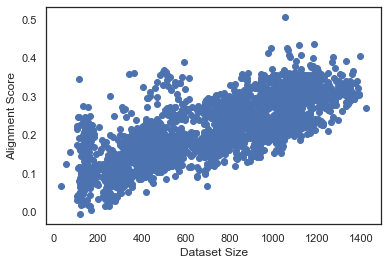

In [35]:
alignments = df_counts['alignment_mean'].to_numpy()
counts = df_counts['alignment_size'].to_numpy()

plt.scatter(counts, alignments)
plt.xlabel('Dataset Size')
plt.ylabel('Alignment Score')
plt.savefig('alignment_scatter.pdf')
print('Alignment correlation with counts:', pearsonr(alignments, counts)[0])

Linear alignment correlation with counts: 0.06539148641794897


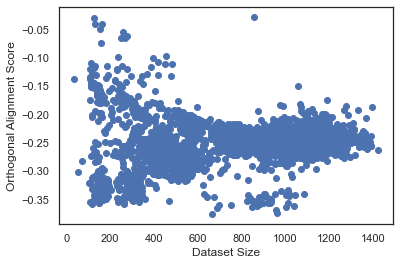

In [36]:
alignments = df_counts['linear_alignment_mean'].to_numpy() * 100
counts = df_counts['linear_alignment_size'].to_numpy()

plt.scatter(counts, alignments)
plt.xlabel('Dataset Size')
plt.ylabel('Orthogonal Alignment Score')
plt.savefig('ortho_alignment_scatter.pdf')
print('Linear alignment correlation with counts:', pearsonr(alignments, counts)[0])

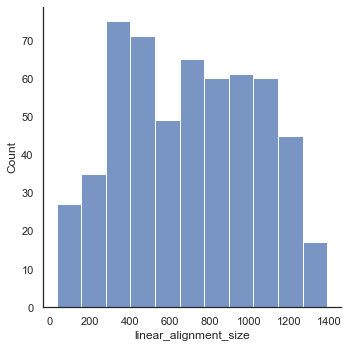

In [9]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

sns.displot(df_counts, x='linear_alignment_size', kind='hist', fill=True)

In [51]:
sns.relplot(df_counts, x='alignment_size', y='alignment_size')

ValueError: Could not interpret value `alignment_size` for parameter `y`

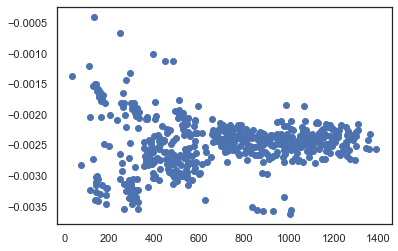

In [52]:
plt.scatter(counts, alignments)